# Projet de Machine Learning

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


## 1. Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
path=""
df=pd.read_csv(path+"gym_members_exercise_tracking.csv",sep=",",header=0)
# Vérification du contenu
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<Figure size 1200x800 with 0 Axes>

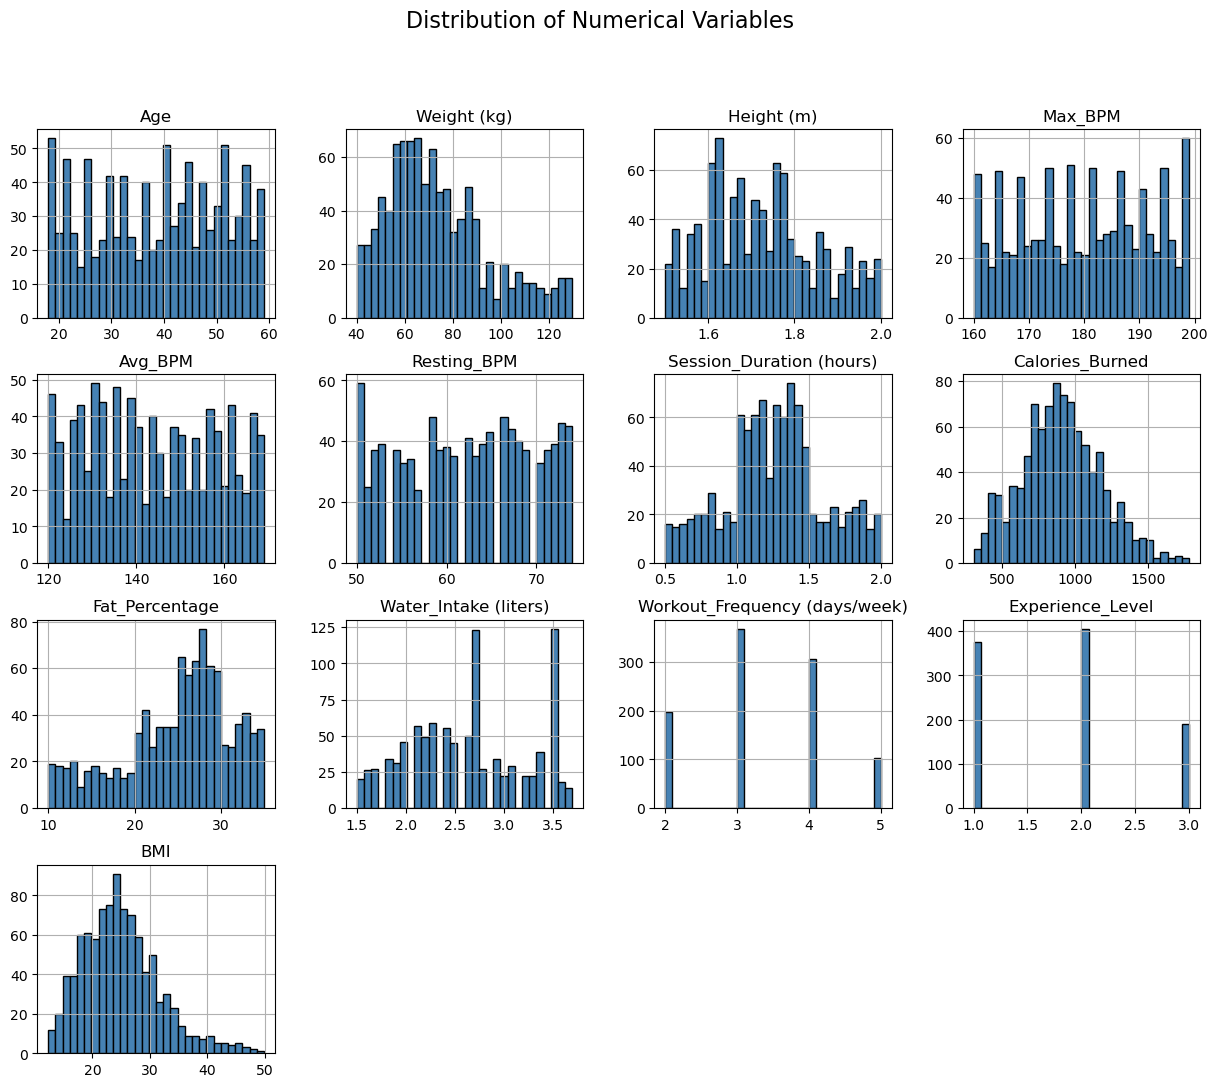

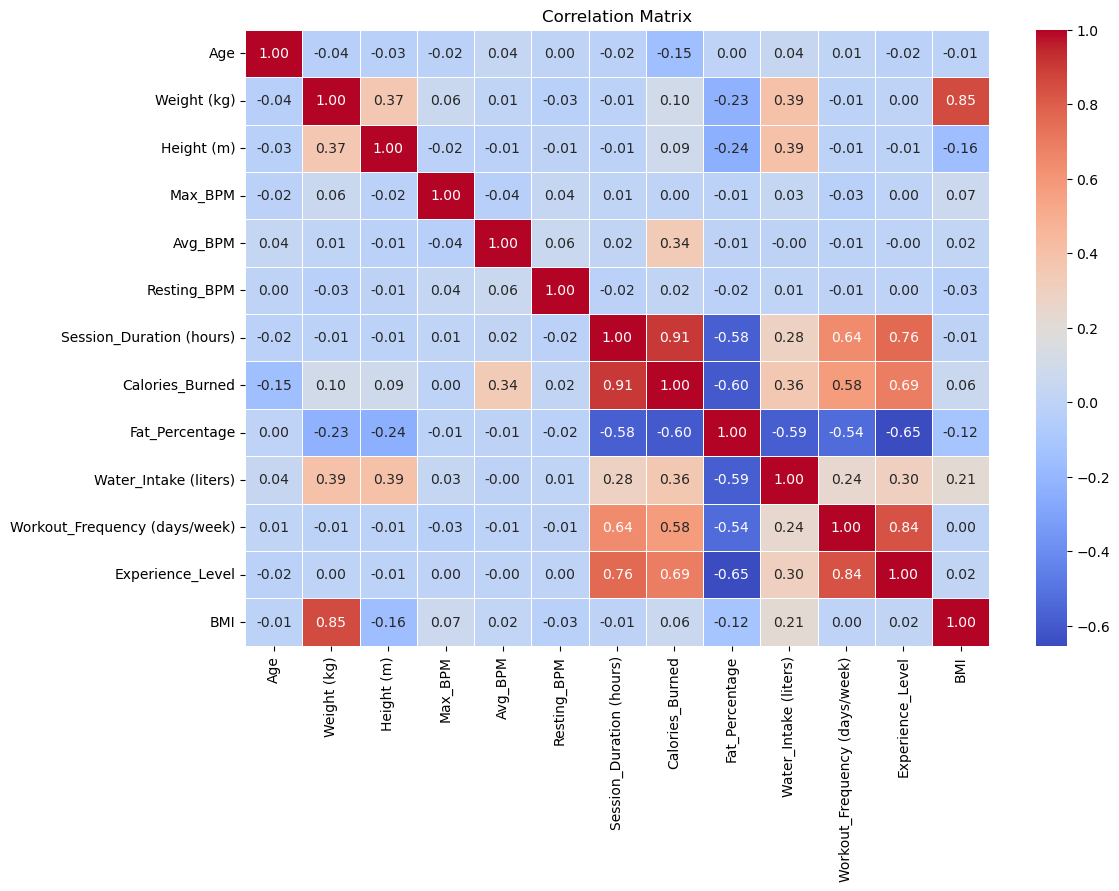

/tmp/ipykernel_25073/3381485430.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Fat_Percentage', data=df, palette='coolwarm')
/tmp/ipykernel_25073/3381485430.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Calories_Burned', data=df, palette='coolwarm')


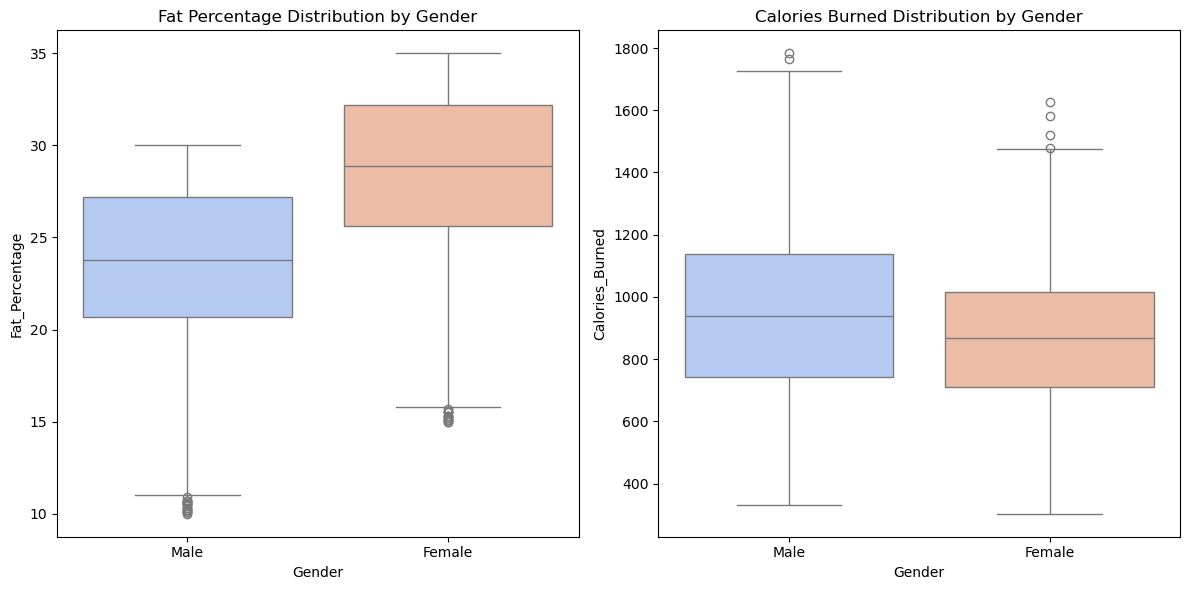

/tmp/ipykernel_25073/3381485430.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df, palette='viridis')


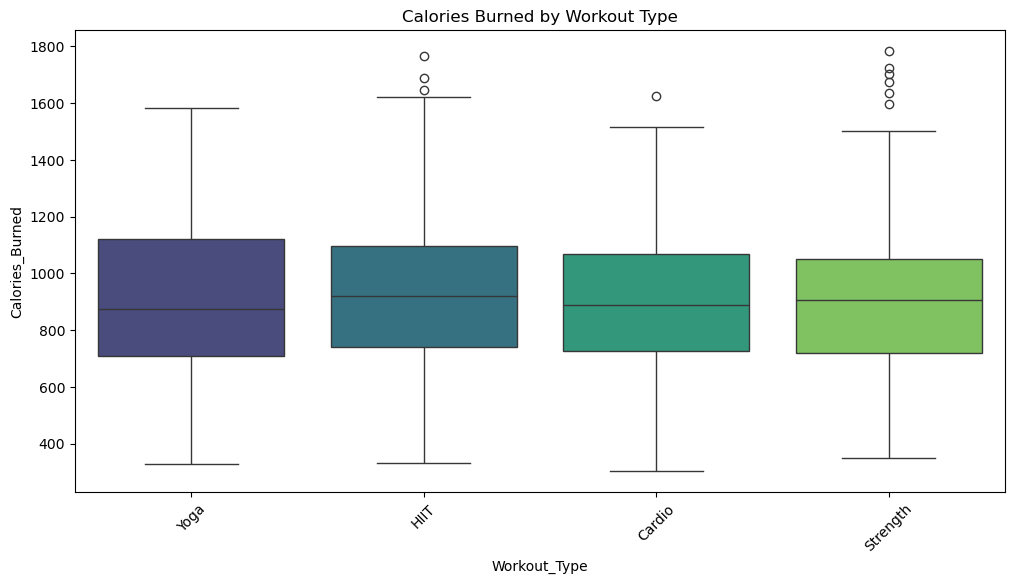

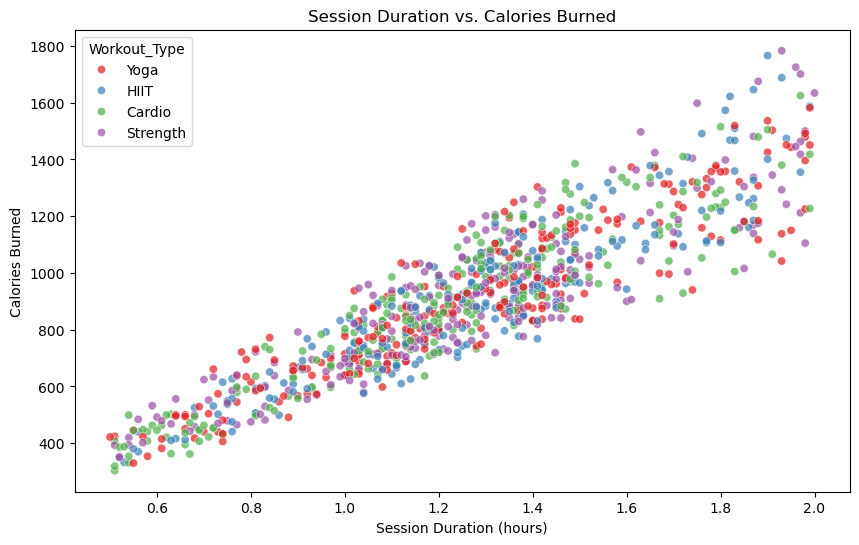

Mean Absolute Error: 35.81
R-squared: 0.9741


In [6]:
df.describe()

# Histogram of numerical features
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(15, 12), color='steelblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Boxplot of fat percentage and calories burned by gender
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Fat_Percentage', data=df, palette='coolwarm')
plt.title('Fat Percentage Distribution by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Calories_Burned', data=df, palette='coolwarm')
plt.title('Calories Burned Distribution by Gender')

plt.tight_layout()
plt.show()

# Calories burned by workout type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Calories Burned by Workout Type')
plt.show()

# Relationship between session duration and calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Session_Duration (hours)'], y=df['Calories_Burned'], hue=df['Workout_Type'], palette='Set1', alpha=0.7)
plt.title('Session Duration vs. Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

# Linear Regression Model for Calories Burned Prediction
features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
            'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 
            'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
X = df[features]
y = df['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.4f}")


In [8]:
data_dummies = pd.get_dummies(data, columns = ["Gender","Workout_Type"]).astype(int)
print(data_dummies)

     Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56           88           1      180      157           60   
1     46           74           1      179      151           66   
2     32           68           1      167      122           54   
3     25           53           1      190      164           56   
4     38           46           1      188      158           68   
..   ...          ...         ...      ...      ...          ...   
968   24           87           1      187      158           67   
969   25           66           1      184      166           56   
970   59           60           1      194      120           53   
971   32          126           1      198      146           62   
972   46           88           1      166      146           66   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                           1             1313              12   
1                           1              883     